<a href="https://colab.research.google.com/github/sg-56/ML-Zoomcamp-Homeworks/blob/main/ML_ZoomCapmp_HW02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [178]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv')
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [179]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [180]:
cols = ['ram','storage','screen','final_price']

data = df[cols].copy()
data.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


<Axes: xlabel='final_price', ylabel='Count'>

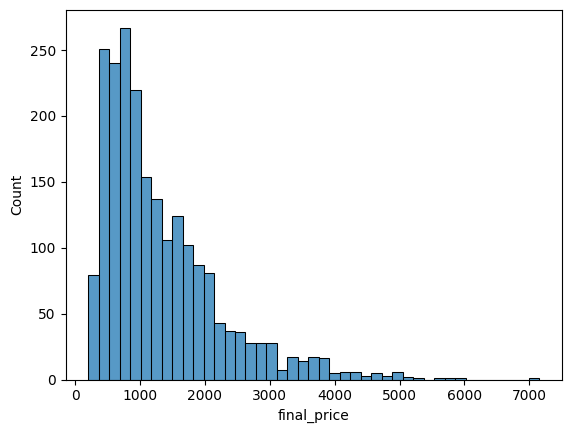

In [181]:
sns.histplot(df['final_price'])

<Axes: xlabel='final_price', ylabel='Count'>

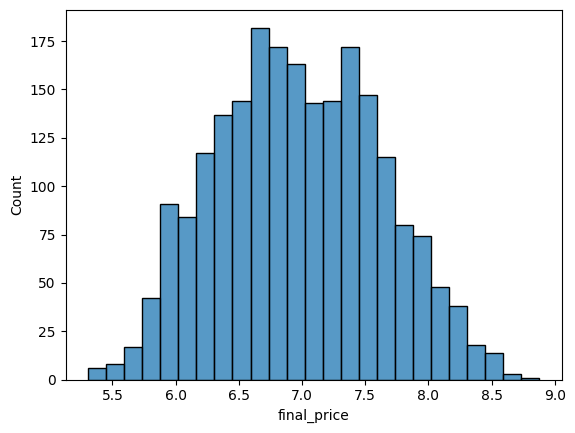

In [182]:
sns.histplot(np.log1p(data['final_price']))

In [183]:
data['price_logs'] = np.log1p(data['final_price'])

In [184]:
data.isna().sum()

,0
ram,0
storage,0
screen,4
final_price,0
price_logs,0


In [185]:
data['ram'].median()

16.0

In [186]:
data.head()

,ram,storage,screen,final_price,price_logs
0,8,512,15.6,1009.00,6.917706
1,8,256,15.6,299.00,5.703782
2,8,256,15.6,789.00,6.672033
3,16,1000,15.6,1199.00,7.090077
4,16,512,15.6,669.01,6.507293


In [187]:
data.drop('final_price', axis=1, inplace=True)

In [188]:
data.head()

,ram,storage,screen,price_logs
0,8,512,15.6,6.917706
1,8,256,15.6,5.703782
2,8,256,15.6,6.672033
3,16,1000,15.6,7.090077
4,16,512,15.6,6.507293


In [189]:
np.random.seed(2)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

data_shuffled = data.iloc[idx]

df_train = data_shuffled.iloc[:n_train].copy()
df_val = data_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = data_shuffled.iloc[n_train+n_val:].copy()

In [190]:
df_train.head()

,ram,storage,screen,price_logs
1510,32,1000,16.0,7.790696
1766,16,512,15.4,7.252515
370,8,512,15.3,7.512071
1714,8,128,14.0,6.109248
2037,16,1000,17.3,6.979462


In [191]:
df_test.head()

,ram,storage,screen,price_logs
1393,8,512,15.6,6.259103
1102,8,64,14.0,5.926926
2083,16,1000,14.0,7.377759
1503,16,512,NaN,7.317212
516,32,500,15.6,7.438384


In [192]:
np.column_stack([np.ones(10),df_train.iloc[:10].values])

array([[   1.        ,   32.        , 1000.        ,   16.        ,
           7.79069603],
       [   1.        ,   16.        ,  512.        ,   15.4       ,
           7.25251451],
       [   1.        ,    8.        ,  512.        ,   15.3       ,
           7.51207125],
       [   1.        ,    8.        ,  128.        ,   14.        ,
           6.10924758],
       [   1.        ,   16.        , 1000.        ,   17.3       ,
           6.9794618 ],
       [   1.        ,   16.        , 1000.        ,   15.6       ,
           7.57604608],
       [   1.        ,   16.        ,  512.        ,   15.        ,
           6.89583451],
       [   1.        ,   16.        ,  512.        ,   15.6       ,
           6.96602419],
       [   1.        ,   16.        , 1000.        ,   14.2       ,
           7.91935619],
       [   1.        ,   16.        ,  500.        ,   14.        ,
           6.47233084]])

In [193]:
class Imputation:
    def __init__(self,data):
        self.data=data

    def Impute_Zero(self):
        data = self.data.copy()
        return data.fillna(0)

    def Impute_Mean(self,value=None):
      data = self.data.copy()
      if value is None:
         return data.fillna(self.data.mean())
      if value:
         return data.fillna(value)


In [194]:
train_imputer = Imputation(df_train)
test_imputer = Imputation(df_test)
val_imputer = Imputation(df_val)

## Linear Regression

In [195]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

# Imputing missing Values with Zero

In [196]:
X_train = train_imputer.Impute_Zero().iloc[:,:-1]  ##All columns except the last one i.e final_price
y_train = df_train['price_logs']
w_0, w = train_linear_regression(X_train, y_train)

In [197]:
X_train

,ram,storage,screen
1510,32,1000,16.0
1766,16,512,15.4
370,8,512,15.3
1714,8,128,14.0
2037,16,1000,17.3
...,...,...,...
219,16,512,13.3
267,8,512,15.6
1216,8,256,15.6
843,8,128,13.0


In [198]:
train_pred = w_0 + X_train.dot(w)

In [199]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [200]:
train_score = round(rmse(y_train,train_pred),2)

In [201]:
X_val = val_imputer.Impute_Zero().iloc[:,:-1]
val_pred = w_0 + X_val.dot(w)
y_val = df_val['price_logs']
Val_Score = round(rmse(y_val,val_pred),2)


print(f"Train Score : {train_score} \t Val Score : {Val_Score}")

Train Score : 0.43 	 Val Score : 0.45


# imputing with Mean

In [202]:
df_train.isna().sum()

,0
ram,0
storage,0
screen,3
price_logs,0


In [203]:
Mean_value = df_train['screen'].mean()

In [204]:
X_train = train_imputer.Impute_Mean().iloc[:,:-1]  ##All columns except the last one i.e final_price
y_train = df_train['price_logs']
w_0, w = train_linear_regression(X_train, y_train)

In [205]:
Train_preds = w_0 + X_train.dot(w)
Train_score = round(rmse(y_train,Train_preds),2)

In [206]:
X_val = val_imputer.Impute_Mean(value = Mean_value).iloc[:,:-1]
val_pred = w_0 + X_val.dot(w)
y_val = df_val['price_logs']
Val_Score = round(rmse(y_val,val_pred),2)

In [207]:
print(f"Train Score : {train_score} \t Val Score : {Val_Score}")

Train Score : 0.43 	 Val Score : 0.45


# Applying Regularization

In [208]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [209]:
X_train = train_imputer.Impute_Zero().iloc[:,:-1]  ##All columns except the last one i.e final_price
y_train = df_train['price_logs']

In [210]:
X_train.shape

(1296, 3)

In [211]:
def Get_Results(train,test,r):
    X_train = train.iloc[:,:-1]
    y_train = train.iloc[:,-1]
    X_test = test.iloc[:,:-1]
    y_test = test.iloc[:,-1]
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    train_score = round(rmse(y_train,w_0 + X_train.dot(w)),2)
    test_score = round(rmse(y_test,w_0 + X_test.dot(w)),2)
    print(f"Reg Value : {r} \n Train Score : {train_score} \t Test Score : {test_score}")
    print()
    return (train_score,test_score)

In [212]:
df_train = train_imputer.Impute_Zero()
df_val = val_imputer.Impute_Zero()
r = [0, 0.01, 0.1, 1, 5, 10, 100]
train_rmse = []
val_rmse = []
for val in r :
    t,v = Get_Results(df_train,df_val,val)
    train_rmse.append(t)
    val_rmse.append(v)

Reg Value : 0 
 Train Score : 0.43 	 Test Score : 0.45

Reg Value : 0.01 
 Train Score : 0.43 	 Test Score : 0.45

Reg Value : 0.1 
 Train Score : 0.43 	 Test Score : 0.45

Reg Value : 1 
 Train Score : 0.44 	 Test Score : 0.45

Reg Value : 5 
 Train Score : 0.47 	 Test Score : 0.47

Reg Value : 10 
 Train Score : 0.52 	 Test Score : 0.5

Reg Value : 100 
 Train Score : 0.7 	 Test Score : 0.62



In [213]:
results = pd.DataFrame({'R':r, 'train_rmse':train_rmse,'val_rmse':val_rmse})
results

,R,train_rmse,val_rmse
0,0.00,0.43,0.45
1,0.01,0.43,0.45
2,0.10,0.43,0.45
3,1.00,0.44,0.45
4,5.00,0.47,0.47
5,10.00,0.52,0.50
6,100.00,0.70,0.62


# Completing the Entire process

In [215]:
class DataPreparation:
    def __init__(self):
        self.data = None
        self.train = None
        self.val = None
        self.test = None
        self.seed_value = None


    def Split_Data(self,df,seed=2):
        self.seed_value = seed
        self.data = df
        np.random.seed(seed)
        n = len(df)
        n_val = int(0.2 * n)
        n_test = int(0.2 * n)
        n_train = n - (n_val + n_test)
        idx = np.arange(n)
        np.random.shuffle(idx)
        df_shuffled = self.data.iloc[idx]
        df_train = df_shuffled.iloc[:n_train].copy()
        df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
        df_test = df_shuffled.iloc[n_train+n_val:].copy()
        self.train = df_train
        self.val = df_val
        self.test = df_test

    def Impute_Zero(self):
        self.train = self.train.fillna(0)
        self.val = self.val.fillna(0)
        self.test = self.test.fillna(0)

    def Get_Data(self,selection='train'):
        if selection == 'train':
            return self.train
        if selection == 'val':
            return self.val
        if selection == 'test':
            return self.test


    def GetTrain_Val(self):
        return np.row_stack([self.train,self.val])











In [216]:
def GetResults(data,seed):
    data_prep = DataPreparation()
    data_prep.Split_Data(data,seed = seed)
    data_prep.Impute_Zero()
    train = data_prep.Get_Data('train')
    val = data_prep.Get_Data('val')
    train_x,train_y = train.iloc[:,:-1],train.iloc[:,-1]
    val_x,val_y = val.iloc[:,:-1],val.iloc[:,-1]
    w_0, w = train_linear_regression_reg(X_train, y_train,r=0) ## Setting r = zero for w/o regularization
    train_preds = w_0 + X_train.dot(w)
    train_score = round(rmse(y_train,train_preds),3)
    val_preds = w_0 + val_x.dot(w)
    val_score = round(rmse(val_y,val_preds),3)
    print(f"Seed Value : {seed} \n Train Score : {train_score} \t Test Score : {val_score}")
    print()
    return (train_score,val_score)



In [217]:
seed_values = np.arange(10)
train_scores = []
val_scores = []

for seed in seed_values:
    train_score,val_score = GetResults(data,seed)
    train_scores.append(train_score)
    val_scores.append(val_score)

Seed Value : 0 
 Train Score : 0.435 	 Test Score : 0.43

Seed Value : 1 
 Train Score : 0.435 	 Test Score : 0.45

Seed Value : 2 
 Train Score : 0.435 	 Test Score : 0.446

Seed Value : 3 
 Train Score : 0.435 	 Test Score : 0.446

Seed Value : 4 
 Train Score : 0.435 	 Test Score : 0.421

Seed Value : 5 
 Train Score : 0.435 	 Test Score : 0.424

Seed Value : 6 
 Train Score : 0.435 	 Test Score : 0.443

Seed Value : 7 
 Train Score : 0.435 	 Test Score : 0.43

Seed Value : 8 
 Train Score : 0.435 	 Test Score : 0.441

Seed Value : 9 
 Train Score : 0.435 	 Test Score : 0.404



In [218]:
results = pd.DataFrame({'seed':seed_values, 'train_rmse':train_scores,'val_rmse':val_scores})
results

,seed,train_rmse,val_rmse
0,0,0.435,0.430
1,1,0.435,0.450
2,2,0.435,0.446
3,3,0.435,0.446
4,4,0.435,0.421
5,5,0.435,0.424
6,6,0.435,0.443
7,7,0.435,0.430
8,8,0.435,0.441
9,9,0.435,0.404


In [219]:
np.std(val_scores)

0.013683932183404008

In [220]:
Prep_Data = DataPreparation()
Prep_Data.Split_Data(data,seed=9)
Prep_Data.Impute_Zero()

train = Prep_Data.Get_Data('train')
val = Prep_Data.Get_Data('val')
test = Prep_Data.Get_Data('test')

In [221]:
Dataset = pd.concat([train,val])
X_train = Dataset.iloc[:,:-1]
y_train = Dataset.iloc[:,-1]




In [222]:
w_0, w = train_linear_regression_reg(X_train, y_train,r=0.001)
test_preds = w_0 + test.iloc[:,:-1].dot(w)
test_score = round(rmse(test.iloc[:,-1],test_preds),3)
print(f"Test Score : {test_score}")

Test Score : 0.455


In [223]:
X_train.head()

,ram,storage,screen
2003,32,1000,15.6
502,8,512,13.3
896,8,512,15.6
356,32,1000,17.3
499,16,1000,16.0


In [224]:
y_train.head()

,price_logs
2003,7.373933
502,7.207860
896,6.309918
356,8.006368
499,7.544332
